# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [2]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 6.4 MB/s eta 0:00:00


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [2]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the labels file of the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SuperKart.csv') #Read a csv file located at the path
data = df.copy() #Create a copy of the Dataframe df and assign it to a variable data

# **Data Overview**

In [4]:
data.head() #Displays first five rows of the dataframe

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


**Observation:**

1. Display the first 5 rows of the dataframe

In [5]:
data.tail() #Displays last five rows of the dataframe

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


**Observation:**

1. Display the last 5 rows of the dataframe

In [6]:
data.shape #shape will return rows & column of data frame

(8763, 12)

**Observation:**

Total number of rows & column present in dataframe are :

1. 8763 rows
2. 12 column


In [7]:
data.info() # Info method, provide quick overview of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Observation:**

Following observation are made using data.info

1. There are total of 8763 rows and 12 column in the dataframe

2. There are no missing value present

3. Four column (Product_Weight, Product_Allocated_Area, Product_MRP, Product_Store_Sales_Total) have datatype float64

4. Only one column (Store_Establishment_Year) have datatype int64

5. Rest all columns (Product_Id, Product_Sugar_Content, Product_Type, Store_Id, Store_Size, Store_Location_City_Type, Store_Type) have datatype object

6. Memory usage is : 821.7+ K1B


In [8]:
data.describe(include ='all').T  # used to generate descriptive statistics of the dataframe (.T will transpose the dataframe, swapping rows and columns)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:**

By using describe function we can conlcude that:

1. Product_Id contain unique value for each product.

2. Product_weight, mean product_weight is 12.65 and median is also 12.66 which means that data is not skewed . It has a min value of 4 and maximum of 22.

3. Product_Sugar_Content, there are total of 4 unique product which has low sugar content and its frequency is 4885.

4. Product_Allocated_Area, mean area is 0.06, median is 0.05 which also implies that data is not much skewed. Min is 0.04 and max is 0.298.

5. Product_Type, There are total of 16 unique type out of which fruit and vegetable is on top with a frequency of 1249.

6. Product_MRP, Mean MRP is 147, median is 146. Min is 31 and max is 266. Here as mean is slightly greater than median data is little bit right skewed.

7. Store_Id, There are total of 4 unique store out of which OUT004 is on top with frequency of 4676.

8. Store_Establishment_Year, Mean year is 2002, 50% of store opened in year 2009. Max store is opened in year 2009. Min year is 1987.As mean is less than median data is left skewed.

9. Store_Size, There are 3 unique store with medium capacity and its frequency is 6025.

10. Store_Location_City_Type, there are 3 unique location out of which Tier2 is on top with frequency of 6262.

11. Store_Type, There are total of 4 unique type of store out of which SupermarketType2 is on top with a frequency of 4676.

12. Product_Store_Sales_Total, Mean sales value is 3464. median value is 3452, min value is 33 and max is 8000. As we can see here mean is greater than median data is rightly skewed.

In [9]:
data.isnull().sum()  #sum of null values per column

,0
Product_Id,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_Type,0
Product_MRP,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0


**Observation:**

1. Based on the output of the method, the data frame does not contain any missing values. The dataset is complete, with no missing values detected.


In [10]:
data.duplicated().sum() #Used to find and count the number of duplicate rows in the Dataframe

np.int64(0)

**Observation:**

1. Based on the output of the method, the data frame does not contain any duplicate values.

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

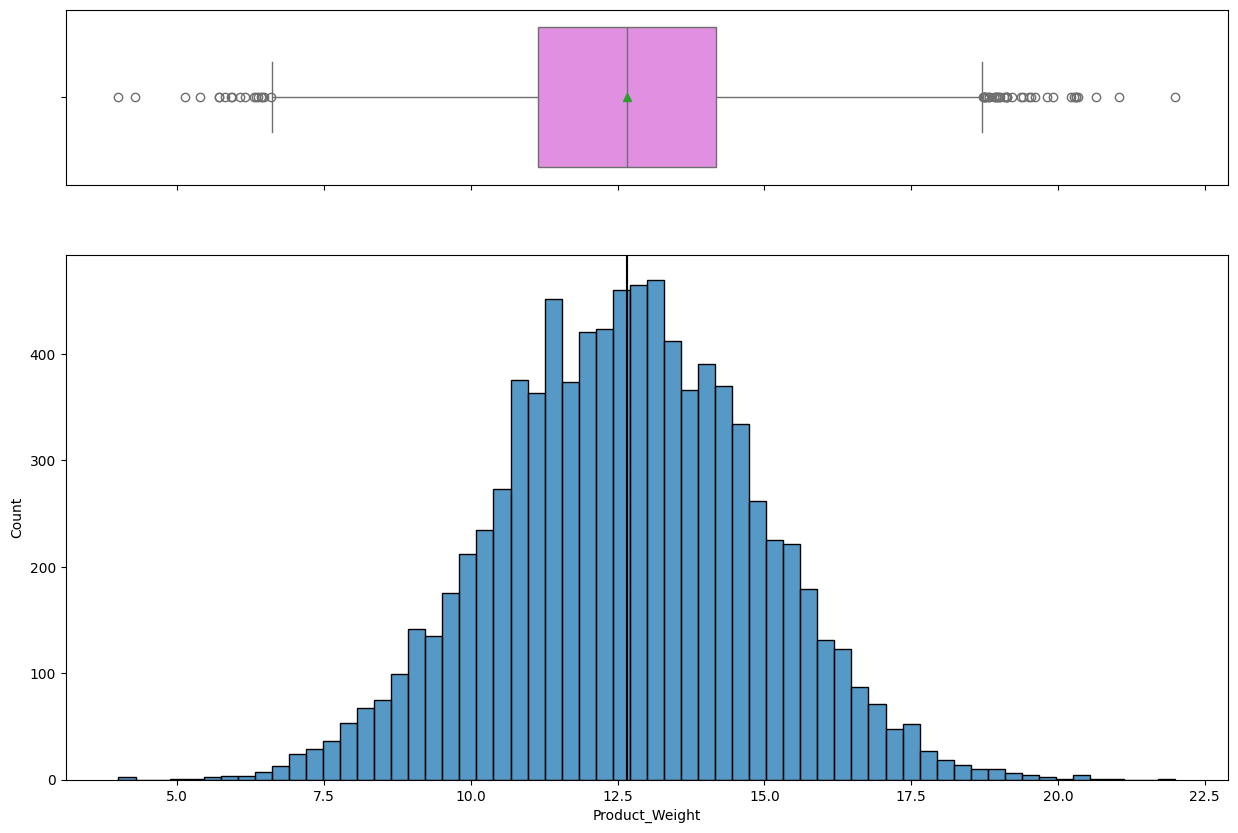

In [12]:
histogram_boxplot(data, "Product_Weight") #create and display a histogram and boxplot

Observation:

1. From the above histogram graph we can see that data is evenly distributed & symmetrical

2. From the boxplot we can conclude that there are no significant outliers present most of the product weight fall within a reasonable range.

3. There are no extreme values present.

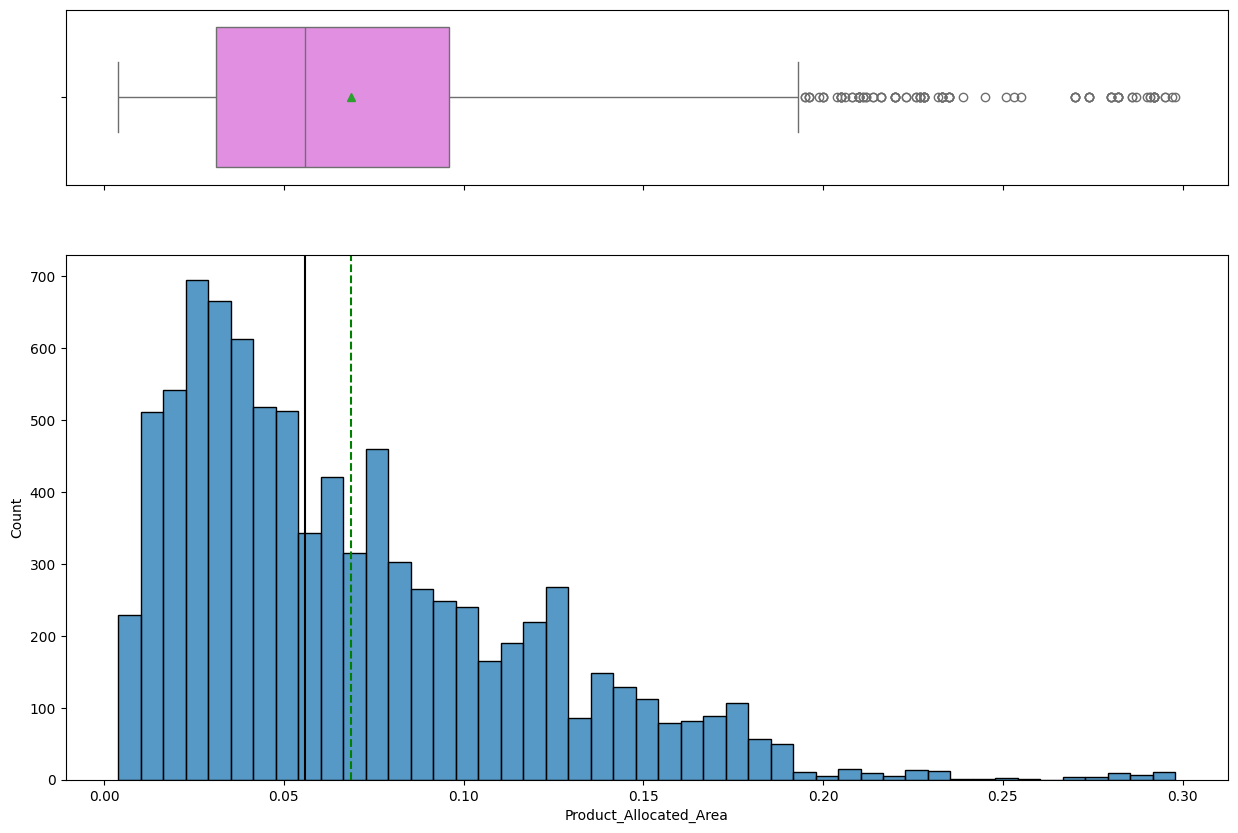

In [13]:
histogram_boxplot(data, "Product_Allocated_Area") #create and display a histogram and boxplot

**Observation:**

1. From Histogram we can conclude that data is right skewed.Most of the products have smaller allocated area only a few having larger allocated area.

2. From the boxplot we can conclude that there are several outliers present on the higher end of the allocated area.



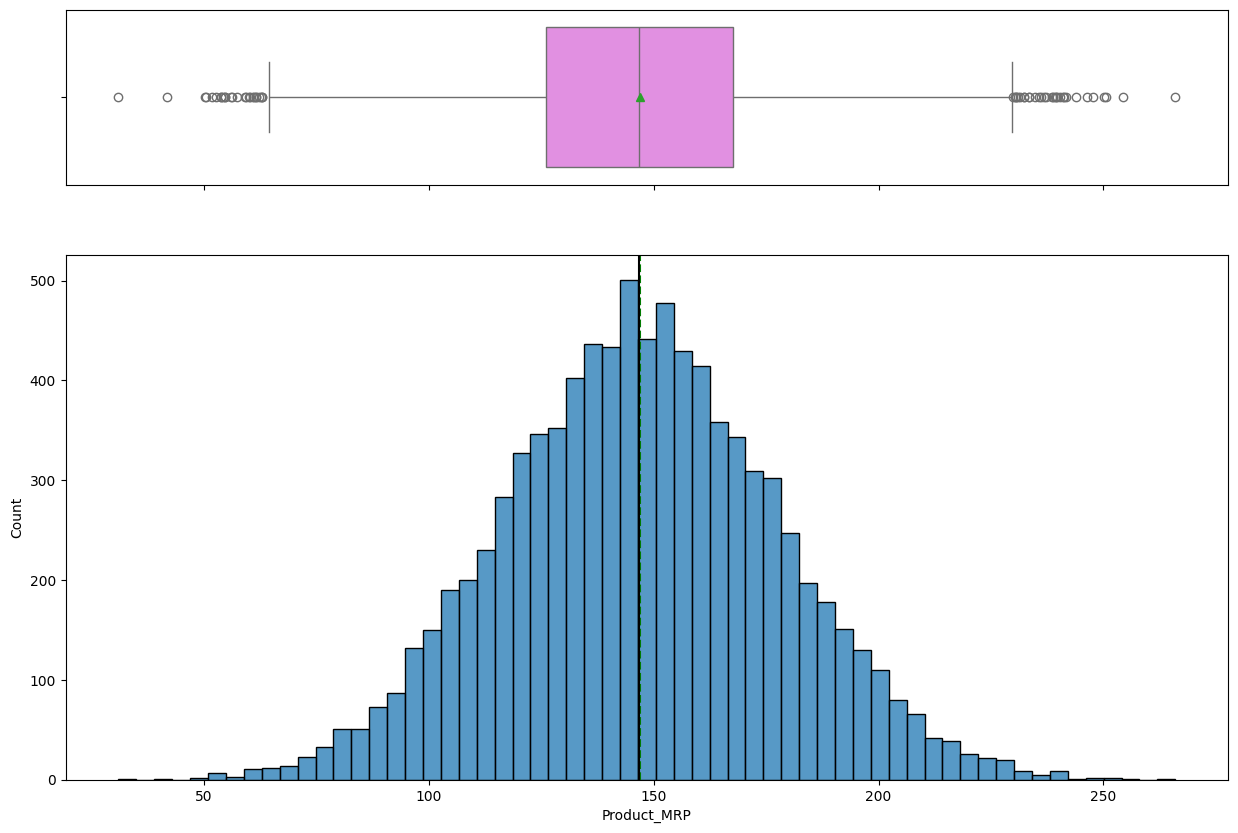

In [14]:
histogram_boxplot(data, "Product_MRP") #create and display a histogram and boxplot

**Observation:**

1. From the histplot, graph seems almost symmetrical.

2. From the boxplot we can conclude that there are no potential outliers present.



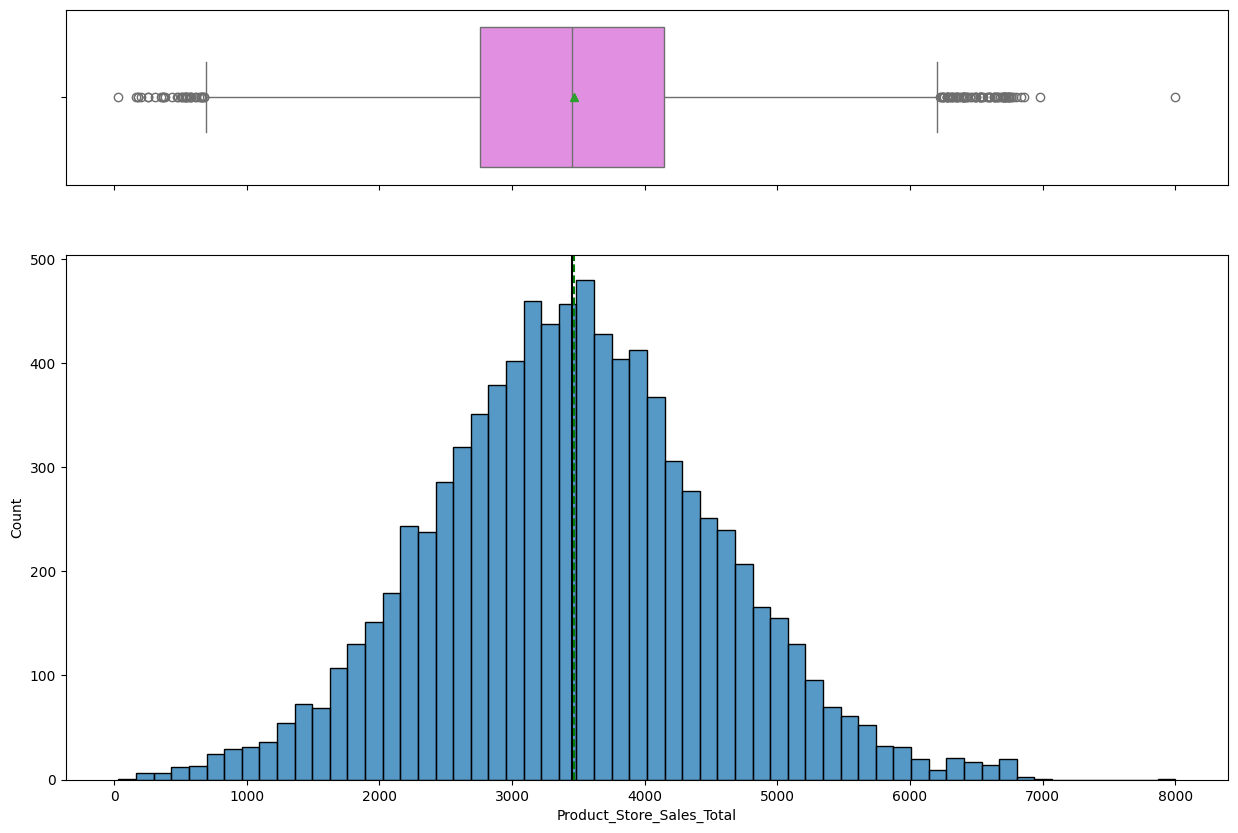

In [15]:
histogram_boxplot(data, "Product_Store_Sales_Total") #create and display a histogram and boxplot

**Observation:**

1. From the above histoplot we can conclude that data is right skewed. Most of the product-store combination have lower sales, while a smaller number have significantly higher sales.

2. From the boxplot we can see that there are some potential outliers present on the higher end of the sales.


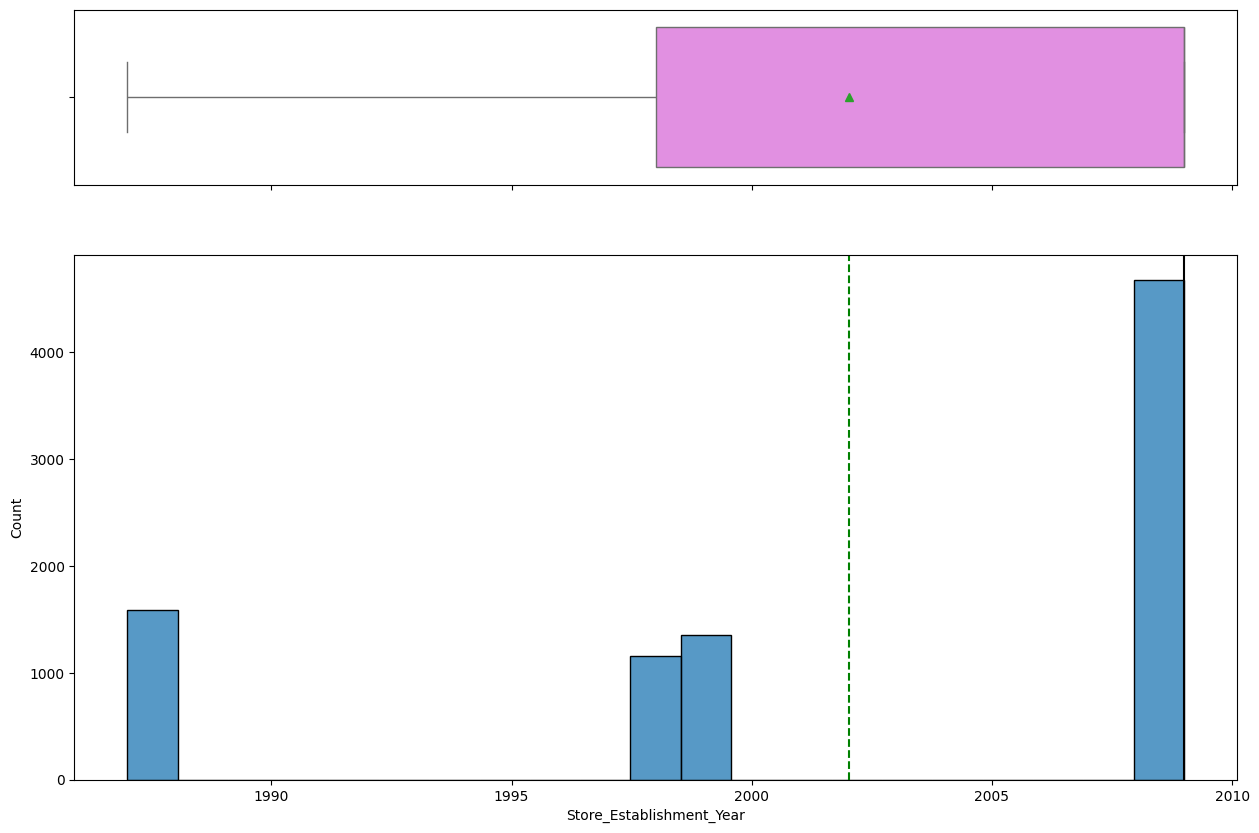

In [16]:
histogram_boxplot(data, "Store_Establishment_Year") #create and display a histogram and boxplot

**Observation:**

1. From the above graph we can conclude that maximum company was extablished in year 2009. Few were opened during 1998 & 1999.

2. Some were opened before 1990.

3. Distribution seems to be left skewed.



In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

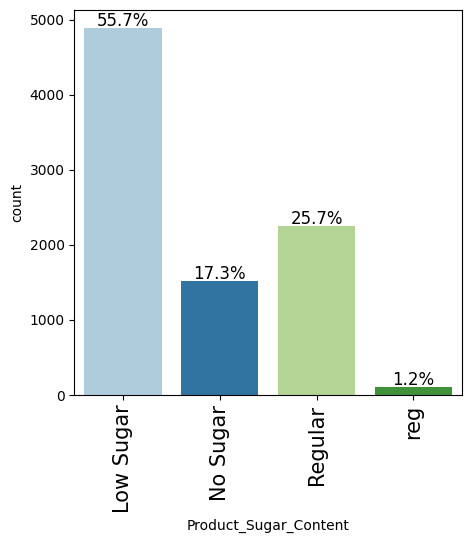

In [18]:
labeled_barplot(data, "Product_Sugar_Content", perc=True) #Display labeled barplot

**Observation:**

1. From the above graph we can concldue that Low sugar content preduct is more in demand. Percenatge wise it is 55.7% .

2. Second comes "Regular" it is 25.7%.

3. Third comes "No sugar" with 17.3% and lastly it is reg with 1.2%

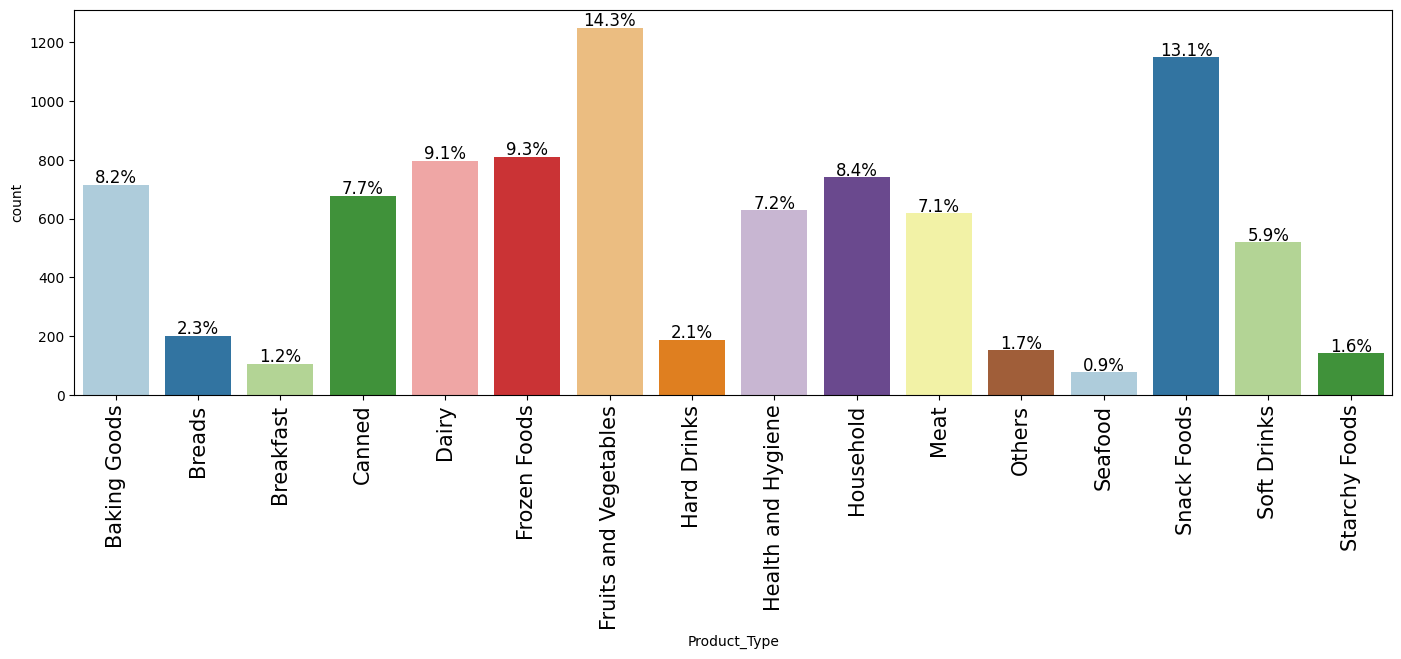

In [19]:
labeled_barplot(data, "Product_Type", perc=True) #Display labeled barplot

**Observation:**

1. From the above graph we can conclude that Fruits and vegetable are more popular with 14.3%

2. Second comes Sancks and Foods with 13.1%.

3. Third comes Frozen foods with 9.3%

4. Sea foods seems quite less popular with 0.9%, Breakfast with 1.2% & starchy food with 1.6%




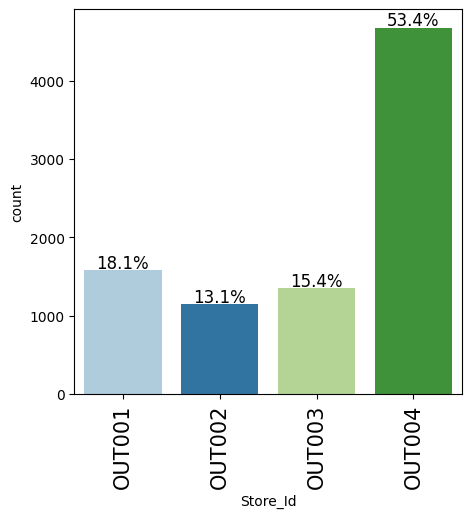

In [20]:
labeled_barplot(data, "Store_Id", perc=True) #Display labeled barplot

**Observation:**

1. OUT004 store seems quite popular with a percentage of 53.4%

2. Second comes OUT001 with 18.1%

3. Third comes OUT003 with 15.4%

4. Lastly OUT002 with 13.1%


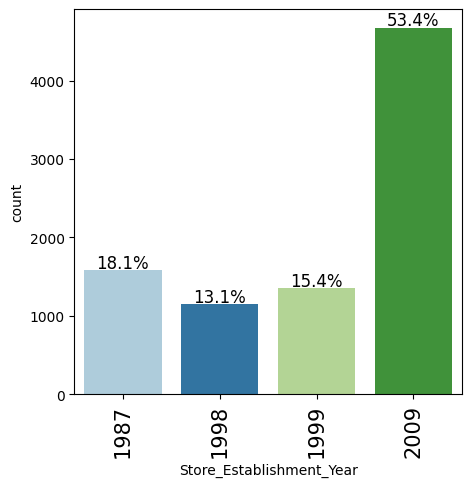

In [21]:
labeled_barplot(data, "Store_Establishment_Year", perc=True) #Display labeled barplot

**Observation:**

1. From the above graph we can conclude that maximum store is opened in year 2009 with 53.4%.

2. Second comes 1987 year where 18.1% store was opened.

3. Third comes 1999 year where 15.4% store was opened.

4. Finally in year 1998, 13.1 % store was opened.


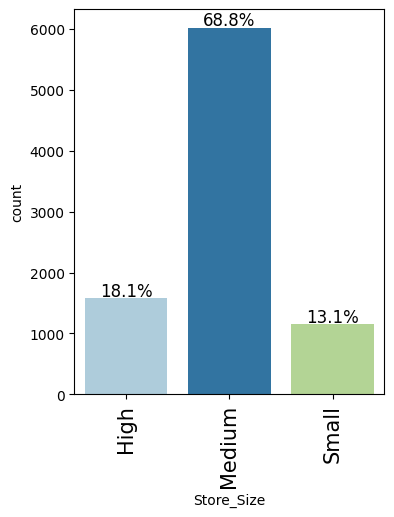

In [22]:
labeled_barplot(data, "Store_Size", perc=True) #Display labeled barplot

**Observation:**

1. From the above graph we can conclude that majority of the store is Medium in size total medium store is 68.8%

2. Second comes High store with 18.1%

3. Lastly is Small store with 13.1%


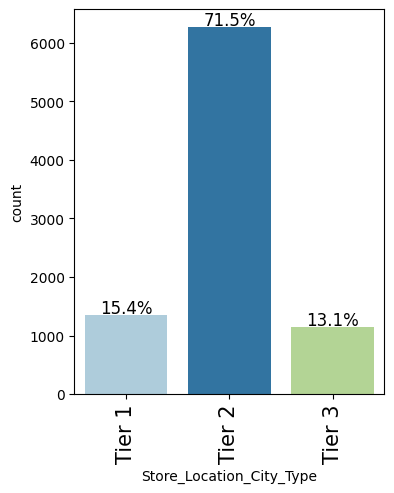

In [23]:
labeled_barplot(data, "Store_Location_City_Type", perc=True) #Display labeled barplot

**Observation:**

1. From the above graph we can conclude that most of the stores are located in Tier2 city. Total store is 71.5%.

2. Second comes Tier1 city with 15.4%

3. Lastly Tier3 with 13.1%.


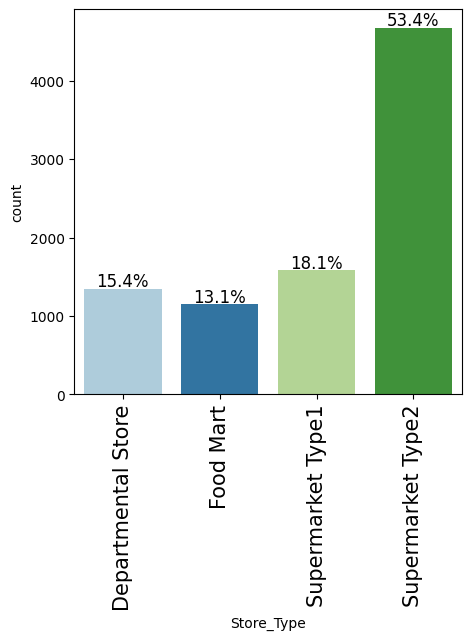

In [24]:
labeled_barplot(data, "Store_Type", perc=True) #Display labeled barplot

**Observation:**

1. From the above graph we can conclude that maximum store is of SupermarketType2 store with a percentage of 53.4%.

2. Second comes Supermarket Type1 type of 18.1%.

3. Third comes Department store of 15.4%

4. Lastly comes Food mart of 13.1%

## Bivariate Analysis

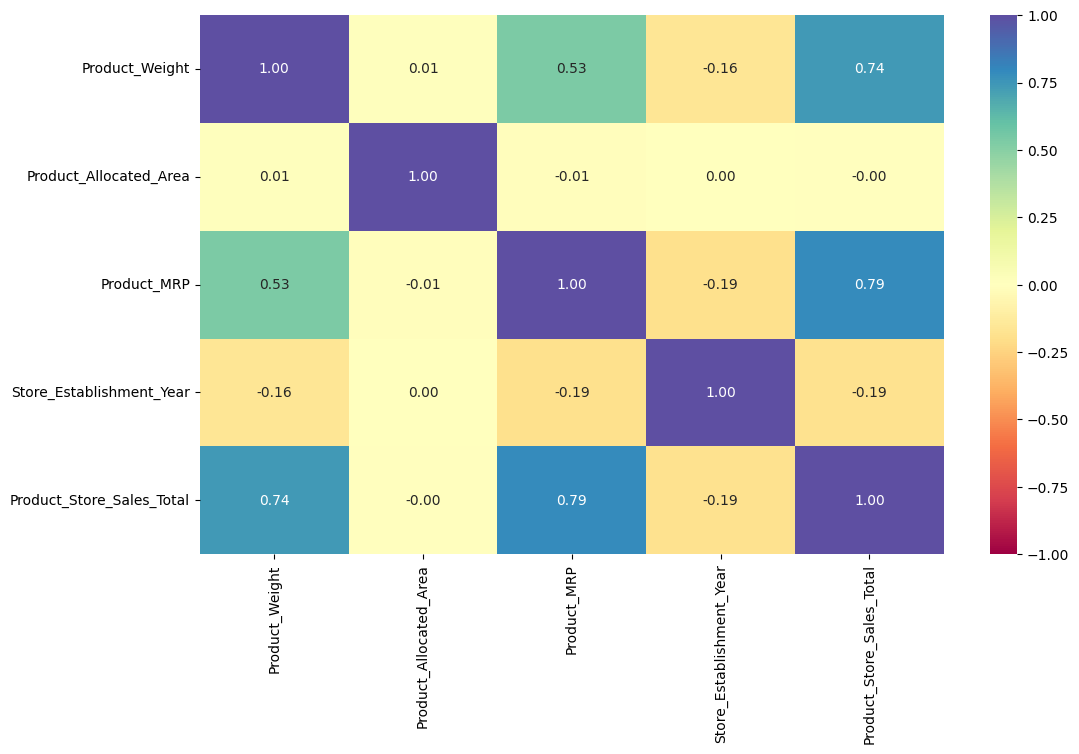

In [25]:
# seperate the numerical values
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**

From the above graph we can conclude that:
  1. There is strong correlation between Product_MRP & Product_Store_Sales_Total which is 0.79.

  2. There is strong correlation between Product_weight & Product_Store_Sales_Total i.e 0.74

  3. There is a positive correlation between Product_MRP & Product_weight i.e 0.53.

  4. There is weak or no correlation between Store_Establishment_year & Product_weight i.e -0.16

  5. There is weak or no correlation between Store_Establishment_year & Product_MRP i.e -0.19.

  6. There is no correlation between Store_Establishment_year & Product_Allocated_Area i.e 0.00



Checking relation between Target variable(Product_Store_Sales_Total) and Product_weight

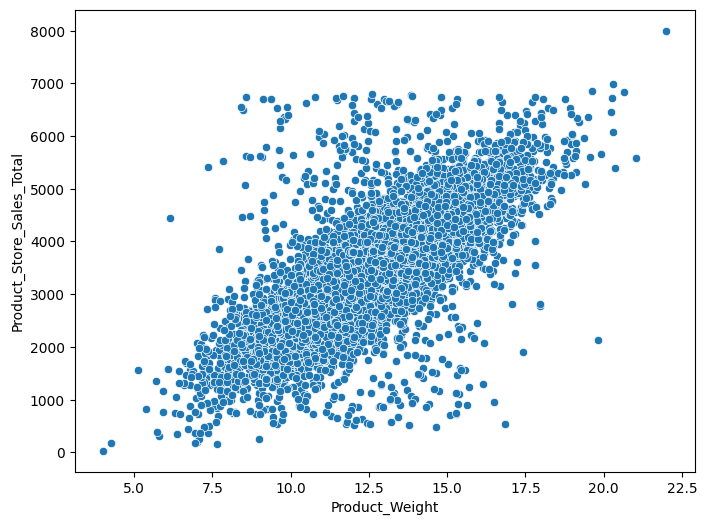

In [26]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Weight, y=data.Product_Store_Sales_Total) #Display Scatterplot graph
plt.show() #Display the plot

**Observation:**

1. From the above graph we can conclude that there is no clear relationship between product_weight & product_store_sales_total. Points are scattered and doesnot resemble any strong direct correlation .


**Checking relation between Target variable(Product_Store_Sales_Total) and Product_Allocated_Area**

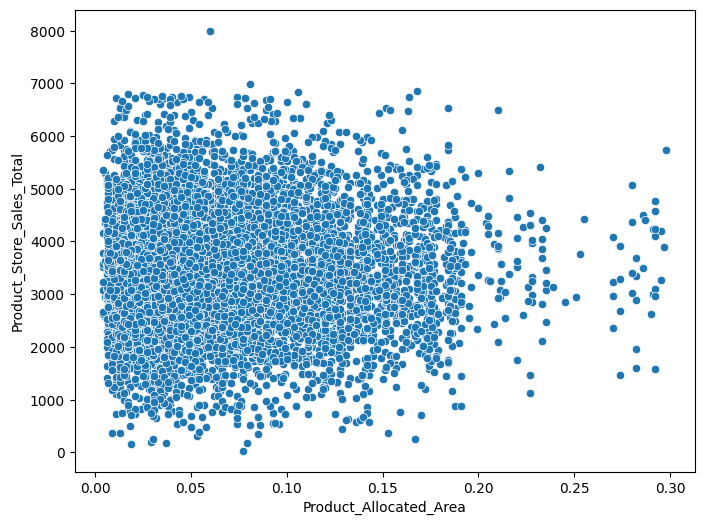

In [27]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Allocated_Area, y=data.Product_Store_Sales_Total) #Display scatterplot graph
plt.show()

**Observation:**

1. From the above graph it seems like there is no strong relationship between Product_Allocated_Area & Produtc_store_sales_total.




**Checking relation between Target variable(Product_Store_Sales_Total) and Product_MRP**

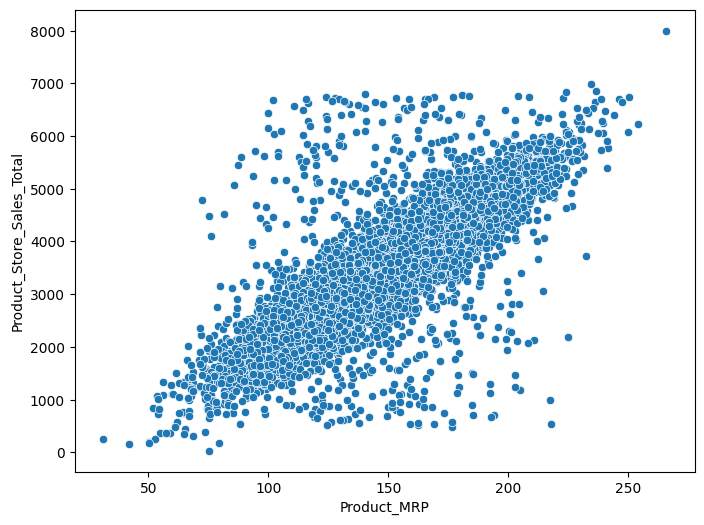

In [28]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_MRP, y=data.Product_Store_Sales_Total) #Display Scatterplot graph
plt.show()

**Observation:**

1. From the above graph we can conclude that there is positive correlation between Product_MRP & Product_Store_Sales_Total. As the retail price increase , total sakes tend to increase.

2. Product_MRP seems like a relevant factor in predicting product_store_sales_total.


Checking relation between Target variable(Product_Store_Sales_Total) and Store_Establishment_Year

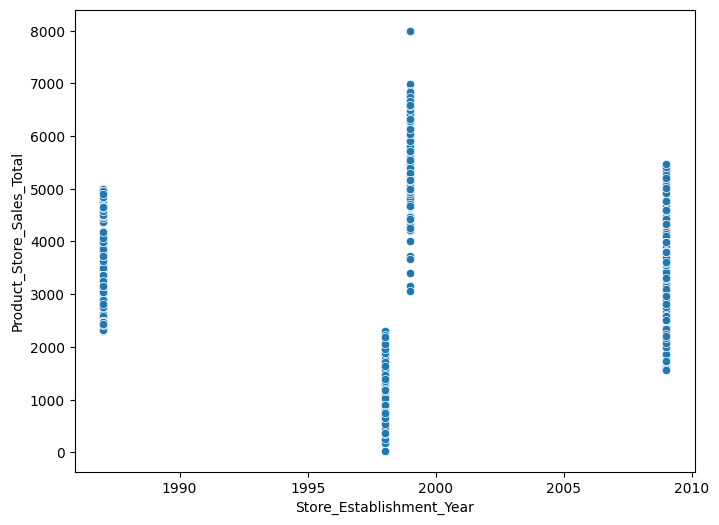

In [29]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Store_Establishment_Year, y=data.Product_Store_Sales_Total) #Display scatterplot graph
plt.show()

**Observation:**

1. From the above graph nothing much can be concluded. Store_establishment_year doesnot seems to have strong predictor.


Checking relation between Target variable(Product_Store_Sales_Total) and Store_Id

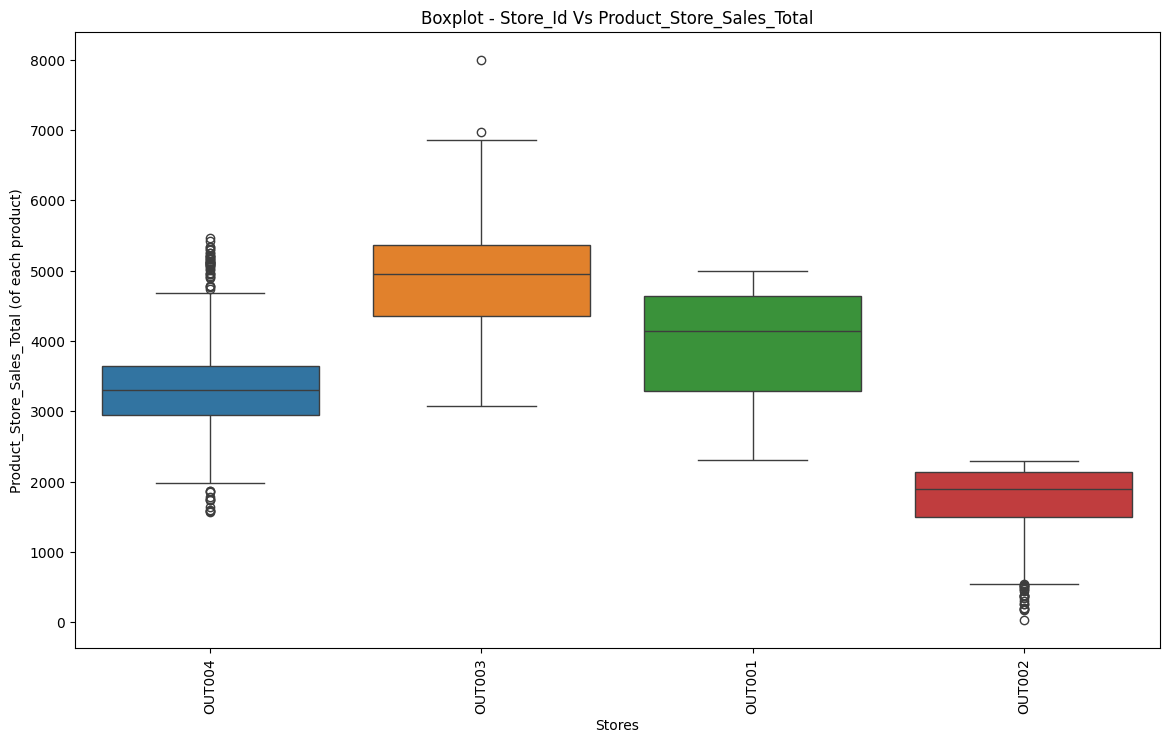

In [30]:
plt.figure(figsize=[14, 8]) #Create new figure for the plot
sns.boxplot(data=data, x="Store_Id", y="Product_Store_Sales_Total", hue = "Store_Id") #display boxplot
plt.xticks(rotation=90) #rotate label on x-axis by 90 degree
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total") #set title of the plot
plt.xlabel("Stores") #set label for x-axis
plt.ylabel("Product_Store_Sales_Total (of each product)") #set label for y-axis
plt.show()

**Observation:**

From the baove graph we can conclude that:
  1. OUT004 and OUT003 are the top performing store and potenital have high sales
  2. OUT002 us the lowest performing stores.

Checking relation between Target variable(Product_Store_Sales_Total) and Store_Size

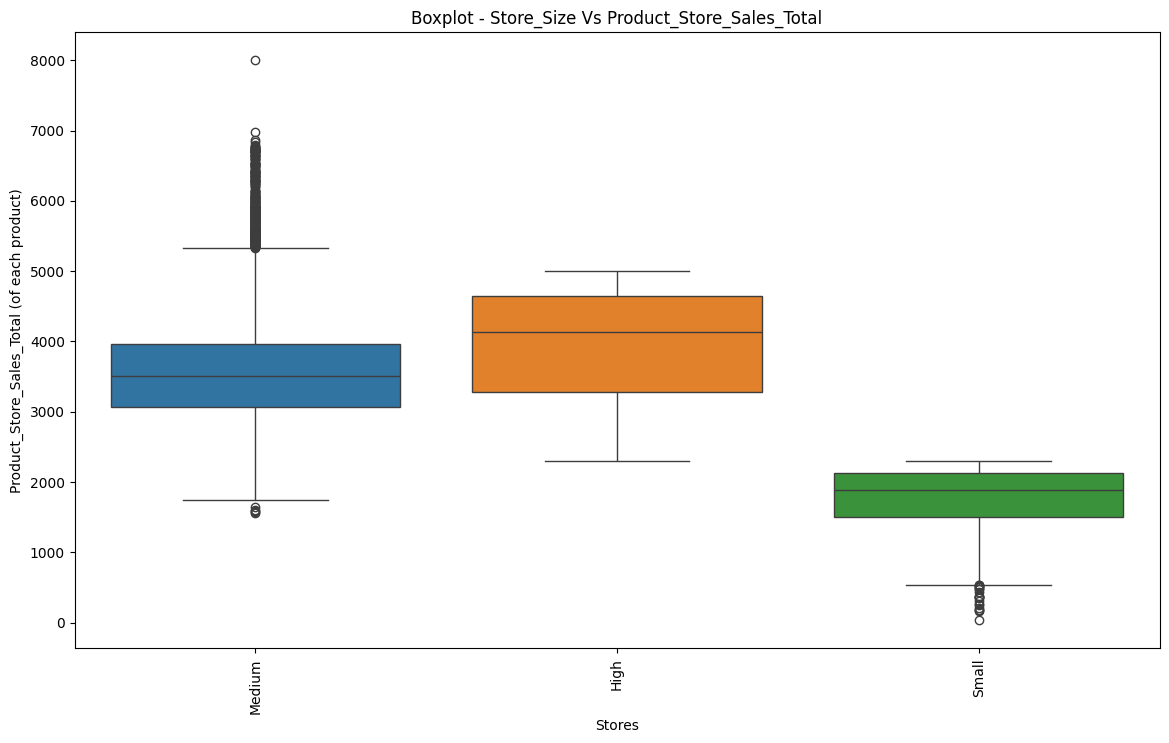

In [31]:
plt.figure(figsize=[14, 8]) #Create new figure for the plot
sns.boxplot(data = data, x = "Store_Size", y = "Product_Store_Sales_Total", hue = "Store_Size") #display boxplot
plt.xticks(rotation=90)  #rotate label on x-axis by 90 degree
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total") #set title of the plot
plt.xlabel("Stores") #set label for x-axis
plt.ylabel("Product_Store_Sales_Total (of each product)") #set label for y-axis
plt.show()

**Observation:**

From the above graph we can conclude that:
  1. High and medium size store have high sales compared to small size store.

**Which product containing sugar is generating more revenue**

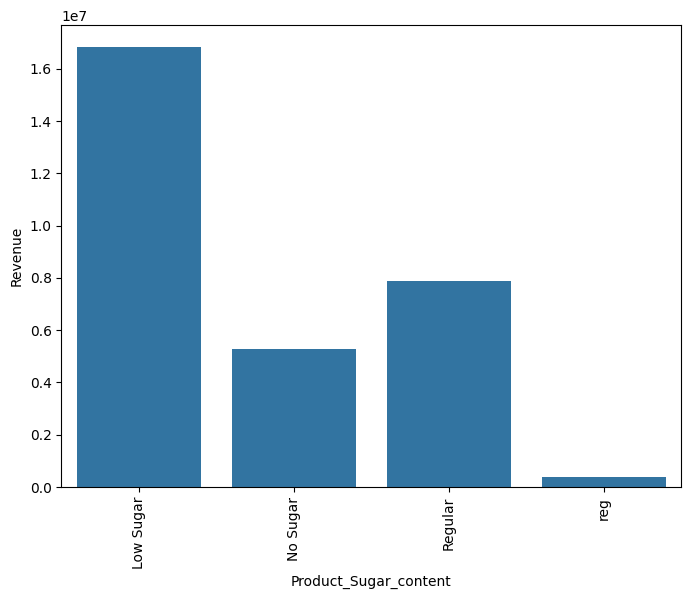

In [32]:
#calculate the total sales for each unique value in the product_sugar_content column.
product_sugar_revenue = data.groupby(["Product_Sugar_Content"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6]) #Create new figure for the plot
plt.xticks(rotation=90) #rotate label on x-axis by 90 degree
b = sns.barplot(
    x=product_sugar_revenue.Product_Sugar_Content, y=product_sugar_revenue.Product_Store_Sales_Total  #display boxplot
)
b.set_xlabel("Product_Sugar_content")  #set label for x-axis
b.set_ylabel("Revenue") #set label for y-axis
plt.show()

**Observation:**

From the above graph we can conclude that:
  1. Low sugar products is more famous and gnerate more revenue.
  2. Followed by Regular food
  3. reg food is least popular.
  

**Which product type is generating more revenue**

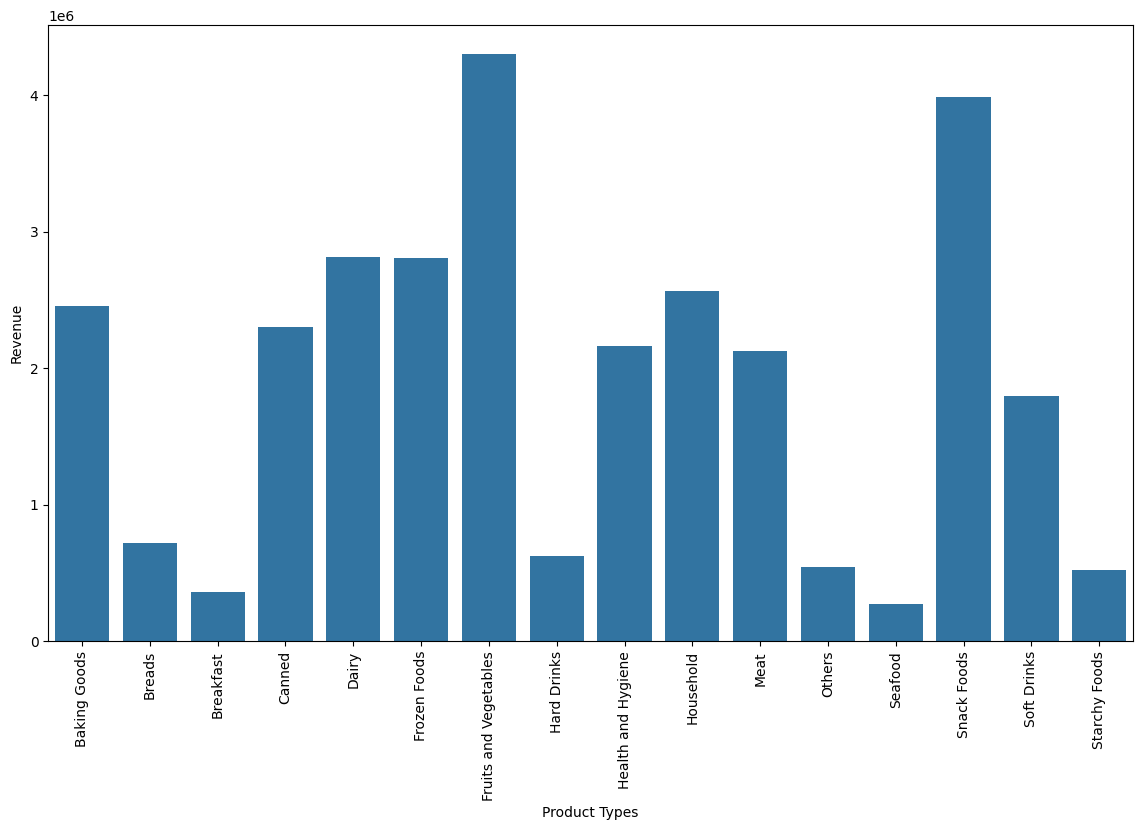

In [33]:
#calculates total sales for each unique value in the product_type column.
product_type_revenue = data.groupby(["Product_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[14, 8])  #Create new figure for the plot
plt.xticks(rotation=90)  #rotate label on x-axis by 90 degree
a = sns.barplot(x=product_type_revenue.Product_Type, y=product_type_revenue.Product_Store_Sales_Total)  #display boxplot
a.set_xlabel("Product Types")  #set label for x-axis
a.set_ylabel("Revenue") #set label for y-axis
plt.show()

**Observation:**

From the above graph we can conclude that:
  1. Fruits & vegetables, sales is more among all the product type.
  2. Second comes snacks foods.
  3. Third comes Dairy & Frozen foods.
  4. Sea foods and Breakfast foods sales is very low.




**Which store id is generating more revenue**

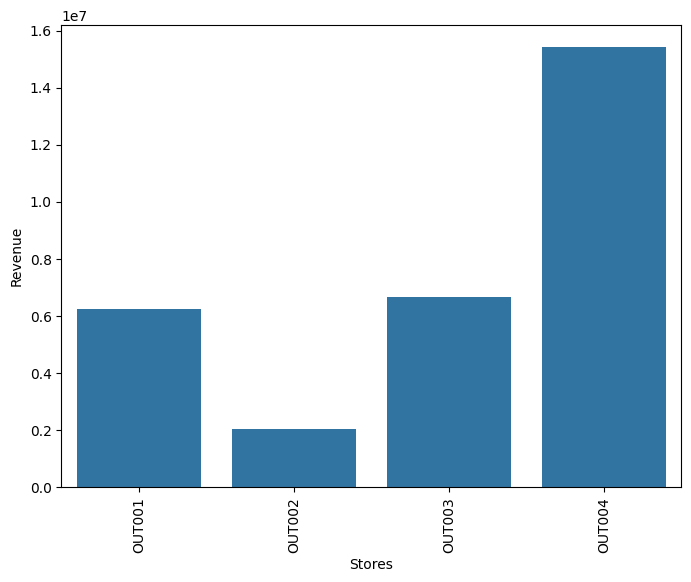

In [34]:
#calculates total sales for each unique store ID.
store_Id_revenue = data.groupby(["Store_Id"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6])  #Create new figure for the plot
plt.xticks(rotation=90)  #rotate label on x-axis by 90 degree
r = sns.barplot(
    x=store_Id_revenue.Store_Id, y=store_Id_revenue.Product_Store_Sales_Total  #display boxplot
)
r.set_xlabel("Stores")  #set label for x-axis
r.set_ylabel("Revenue")  #set label for y-axis
plt.show()

**Observation:**

From the above graph it can be concluded that:
  1. OUT004 is most famous outlet and generate more revenue.
  2. Second comes OUT003
  3. Third come OUT001
  4. Lastly it is OUT002.


**Which store size is generating more revenue**

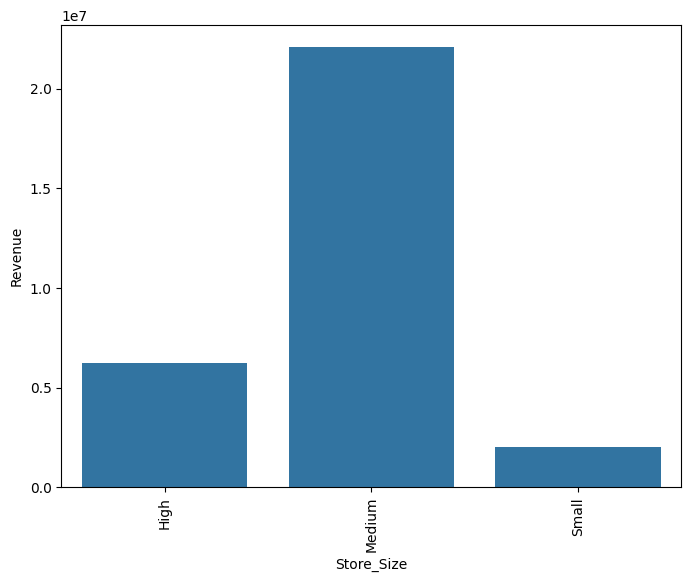

In [35]:
#calculates total sales for each unique value in the store size column
stores_size_revenue = data.groupby(["Store_Size"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6]) #Create new figure for the plot
plt.xticks(rotation=90) #rotate label on x-axis by 90 degree
c = sns.barplot(x=stores_size_revenue.Store_Size, y=stores_size_revenue.Product_Store_Sales_Total)  #display boxplot
c.set_xlabel("Store_Size") #set label for x-axis
c.set_ylabel("Revenue") #set label for y-axis
plt.show()

**Observation:**

From the above graph we can conclude that:
  1. There are mostly medium type of stores and they are having more business and generate more revenue
  2. Seocnd comes High
  3. Last is small.


**Which Store Location City Type is generating more revenue**

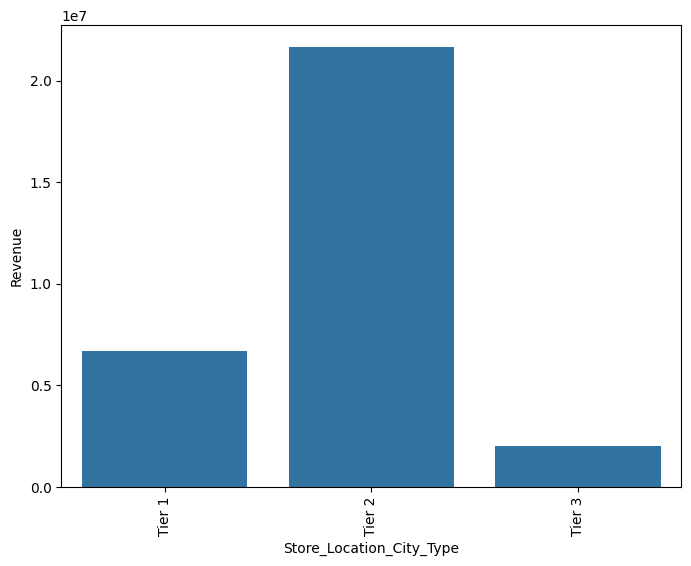

In [36]:
#calculates total sales for each unique value in the store_location_city_type
Store_Ltype_revenue = data.groupby(["Store_Location_City_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6]) #Create new figure for the plot
plt.xticks(rotation=90)  #rotate label on x-axis by 90 degree
d = sns.barplot(
    x=Store_Ltype_revenue.Store_Location_City_Type, y=Store_Ltype_revenue.Product_Store_Sales_Total #display boxplot
)
d.set_xlabel("Store_Location_City_Type") #set label for x-axis
d.set_ylabel("Revenue") #set label for y-axis
plt.show()

**Observation:**

From the above graph we can conclude that:
  1. Tier 2 city type is having more store location and generate more revenue.
  2. Second comes Tier 1 type
  3. Lastly is Tier 3 type.


**Which Store Type is generating more revenue**

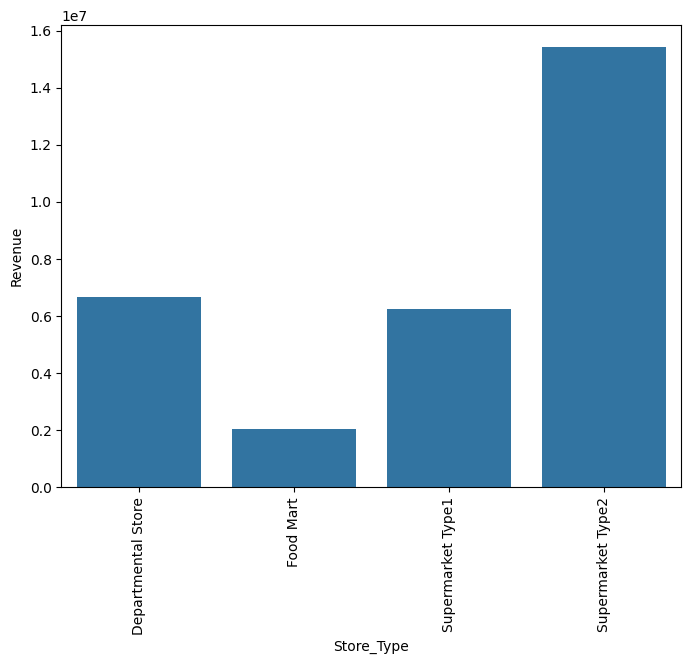

In [37]:
#calculates total sales for each unique value in the store_type column
Store_type_revenue = data.groupby(["Store_Type"], as_index=False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize=[8, 6]) #Create new figure for the plot
plt.xticks(rotation=90) #rotate label on x-axis by 90 degree
e = sns.barplot(x=Store_type_revenue.Store_Type, y=Store_type_revenue.Product_Store_Sales_Total) #display boxplot
e.set_xlabel("Store_Type")  #set label for x-axis
e.set_ylabel("Revenue") #set label for y-axis
plt.show()

**Observation:**

From the above graph we can conclude that:
  1. Supermarket Type2 is providing more business and generating more revenue.
  2. Second comes Departmental store
  3. Third comes Supermarket Type1
  4. Lastly is food mart type.


**Checking whether there is any relation between Product Type and Product weight**

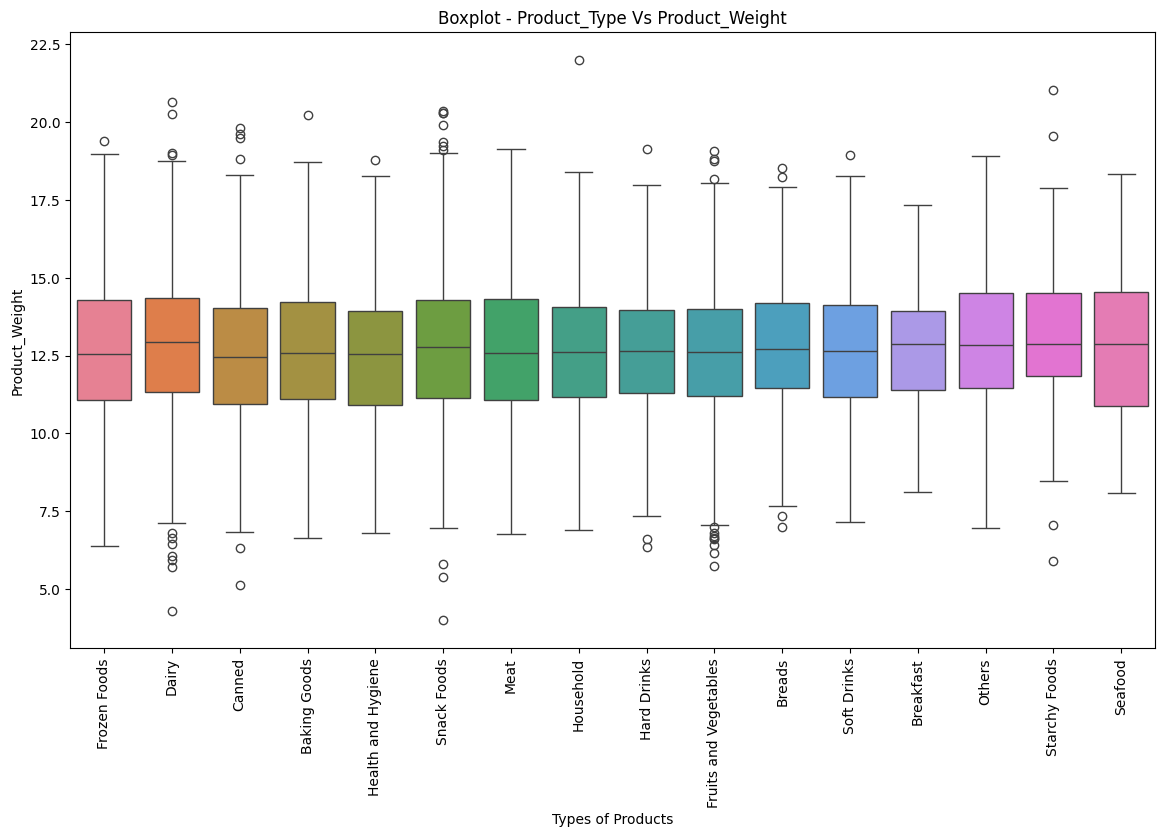

In [38]:
plt.figure(figsize=[14, 8]) #Create new figure for the plot
sns.boxplot(data = data, x = "Product_Type", y = "Product_Weight", hue = "Product_Type") #display boxplot
plt.xticks(rotation=90) #rotate label on x-axis by 90 degree
plt.title("Boxplot - Product_Type Vs Product_Weight") #set title of the plot
plt.xlabel("Types of Products") #set label for x-axis
plt.ylabel("Product_Weight") #set label for y-axis
plt.show()

**Observation:**

From the above graph we can conclude that:
  1. Some of the products have bigger box might have higher weight e.g Seafood, meat , Frozen foods etc.
  2. Some of the products which have smaller box may have lower weight e.g Breakfast, Breads, Hard drinks etc

**Checking whether there is any relation between Product weight and its sugar content**

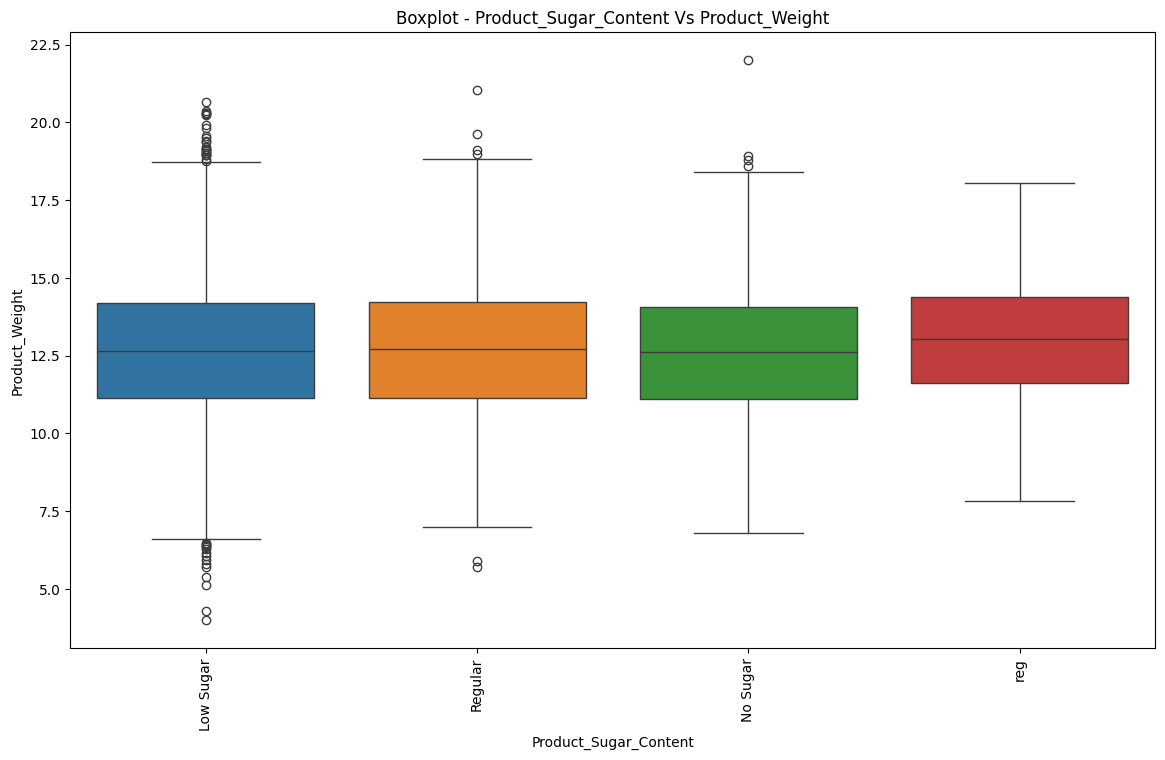

In [39]:
plt.figure(figsize=[14, 8]) #Create new figure for the plot
sns.boxplot(data = data, x = "Product_Sugar_Content", y = "Product_Weight", hue = "Product_Sugar_Content") #display boxplot
plt.xticks(rotation=90) #rotate label on x-axis by 90 degree
plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight") #set title of the plot
plt.xlabel("Product_Sugar_Content") #set label for x-axis
plt.ylabel("Product_Weight") #set label for y-axis
plt.show()

**Observation:**

From the above graph it can be concluded that there is no such relation between product weight & its sugar content as all the median is almost similar

**Checking how the Product_MRP varies with the different stores**

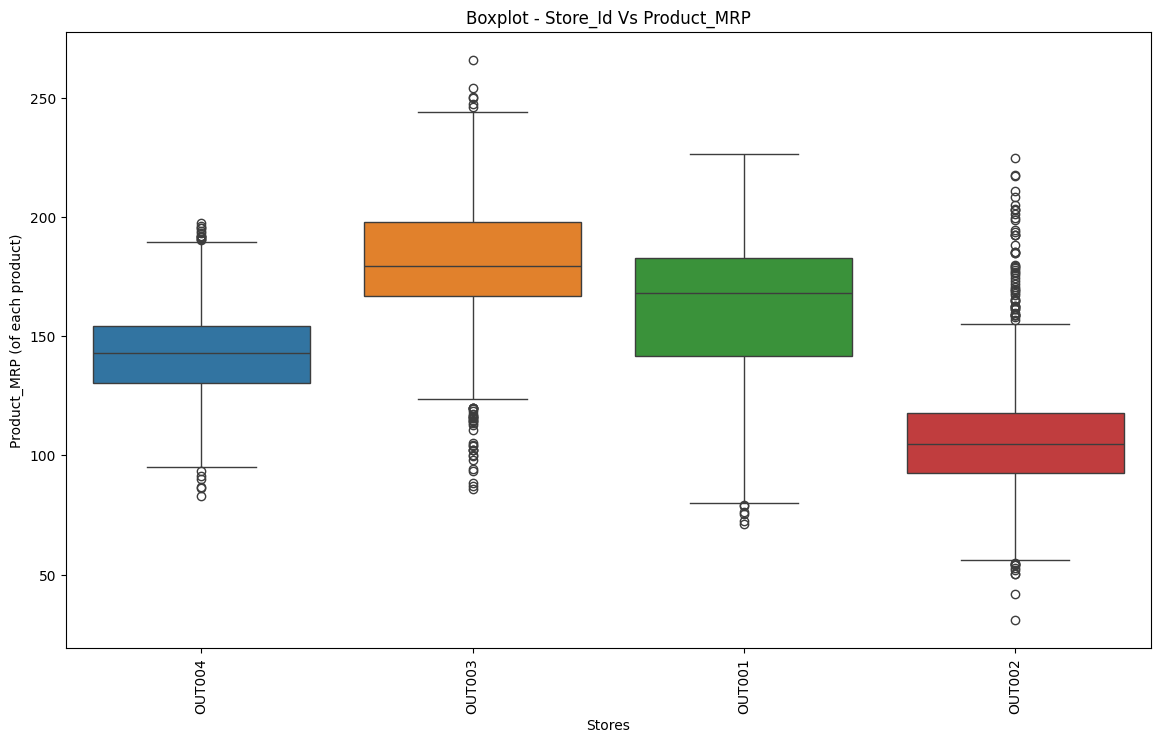

In [40]:
plt.figure(figsize=[14, 8]) #Create new figure for the plot
sns.boxplot(data = data, x = "Store_Id", y = "Product_MRP", hue = "Store_Id") #display boxplot
plt.xticks(rotation=90) #rotate label on x-axis by 90 degree
plt.title("Boxplot - Store_Id Vs Product_MRP") #set title of the plot
plt.xlabel("Stores") #set label for x-axis
plt.ylabel("Product_MRP (of each product)") #set label for y-axis
plt.show()

**Observation:**

From the above graph we can conclude that:

  1. Store OUT003 has more MRP price of each product compared to OUT001 & OUT004.
  2. OUT002 has least price among all the store.

**checking how many items of each product type has been sold in each of the stores**

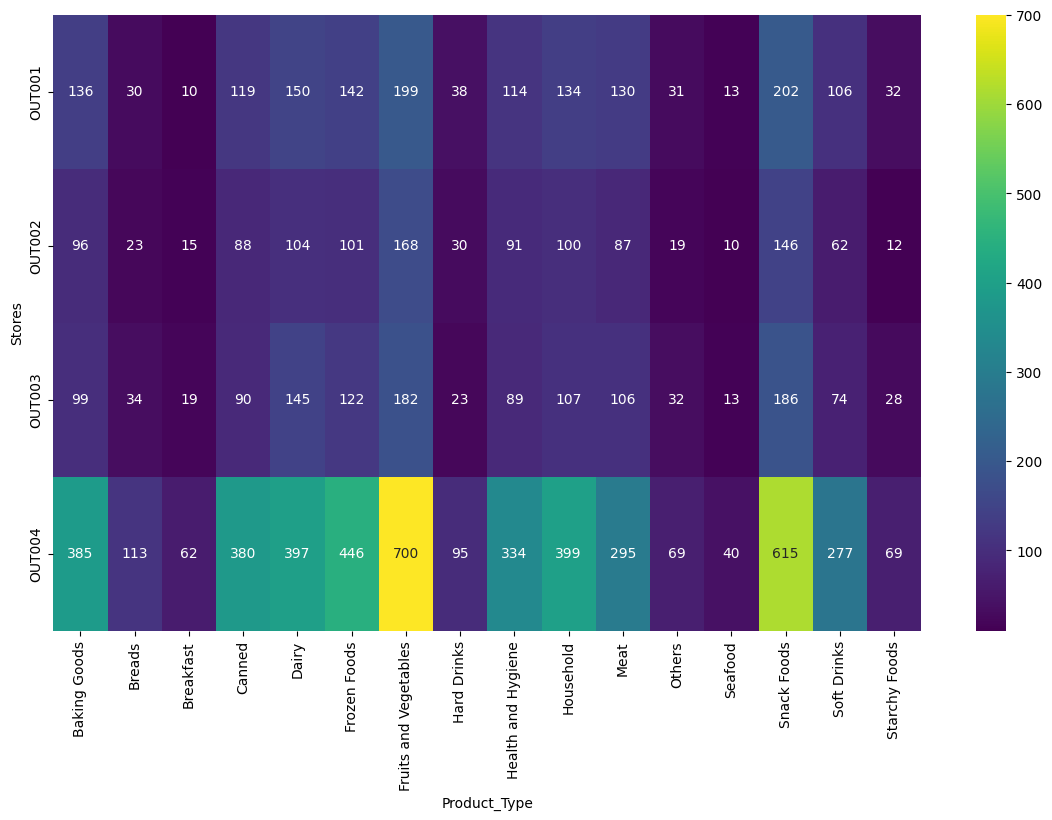

In [41]:
plt.figure(figsize=(14, 8)) #Create new figure for the plot
sns.heatmap(
    pd.crosstab(data["Store_Id"], data["Product_Type"]), #create a tables for store-id and product_type & count occurence of each combination of store-id and product-type
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Stores") #set label for y-axis
plt.xlabel("Product_Type")  #set label for x-axis
plt.show()

**Observation:**

From the above graph we can conclude that:

  1. Fruits & vegetables is highest sales in store OUT004
  2. Snakcs & foods items comes second highest sales in store OUT004.
  3. Overall OUT004 has is the highest sales store among all the three other


# **Data Preprocessing**

In [42]:
data.Product_Sugar_Content.value_counts() #display each unique value found in product_sugar_content column

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2251
No Sugar,1519
reg,108


Product_Sugar_Content column, there are 4 types - Low Sugar, No Sugar, Regular and reg.

It seems like Regular and reg are referring to the same category. So let's replace reg with Regular.

In [43]:
# Replacing reg with Regular
data.Product_Sugar_Content.replace(to_replace=["reg"], value=["Regular"], inplace=True)

In [44]:
data.Product_Sugar_Content.value_counts() #display each unique value found in product_sugar_content column

,count
Product_Sugar_Content,
Low Sugar,4885
Regular,2359
No Sugar,1519


**Observation:**

1. Reg data is replaced with Regular. Total Regular count is chnaged from 2251 to 2359.


**Exploring Patterns in Product_IDs**

We can see that the Product_Id column has two characters followed by a number.

try to find that whether there is any relationship with the other columns or not

In [45]:
## extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [46]:
data["Product_Id_char"].unique() #diaply unique value present in the column

array(['FD', 'NC', 'DR'], dtype=object)

In [47]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique() #display unique value present in the column

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [48]:
data.loc[data.Product_Id_char == "DR +", "Product_Type"].unique()  #display unique value present in the column

array([], dtype=object)

In [49]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()   #display unique value present in the column

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

**Observation:**

From the above analysis we can conclude that there prefix like FD , NC and DR is related to Food , Non consumable goods and drink.


**Grouping Product Types into Perishables and Non-Perishables.**

In [50]:
#Creates python list and assign it to perishable variables.
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [51]:
def change(x): #define a function name change which accepts one argumenst
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"

In [52]:
data['Product_Type_Category'] = data['Product_Type'].apply(change) #create new column in data dataframe.

In [53]:
data.head() #display default first 5 rows.

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Product_Type_Category
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,Non Perishables


Observation:

Display first five rows of the data frame.

**Store's Age**

In [54]:
# Outlet Age
data["Store_Age_Years"] = 2025 - data.Store_Establishment_Year #store calculated age in new column

Observation:

This column contains age of each stores in years based on the difference between the year 2025 and stores establishment year.

**Outlier Check**

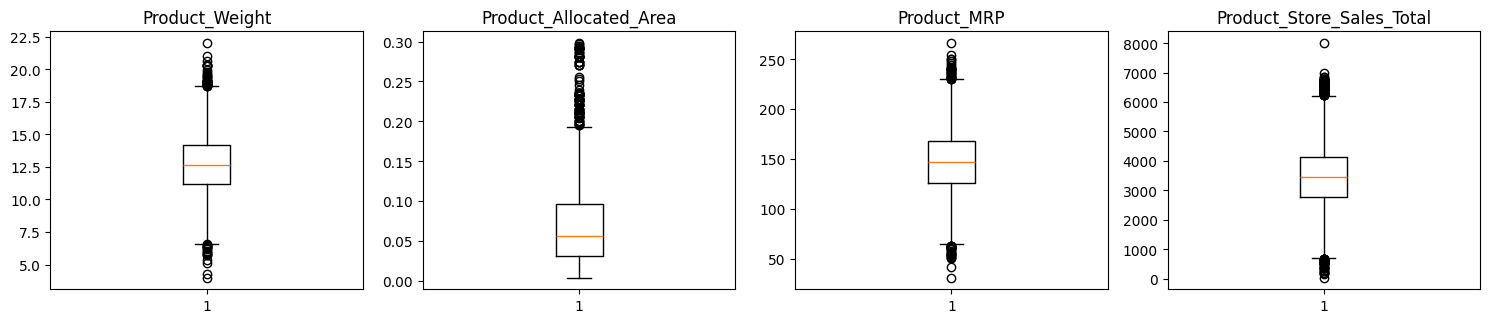

In [55]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observation:

From the above graph we can conclude that there are potentail outliers present in these case. As these outliers might represent genuine and valuable information in sales perspective,like outliers in case of high sales values could represent successful promotion , or popular products in specific stores.removing them might leads a model to underestimate potential high sales.

**Data Preparation for Modeling**

Our aim is to forecast the Product_Store_Sales_Total for upcoming quarters.



In [56]:
data.shape #display the number of rows and column of data

(8763, 15)

In [57]:
data = data.drop(["Product_Id", "Product_Type", "Store_Id", "Store_Establishment_Year"], axis=1) #dropping the column

In [58]:
data.shape #display the number of rows and column of data

(8763, 11)

**Observation:**

Before dropping the column there were total of 15 column and 8763 rows. After dropping the column, column chnaged from 15 to 11 and rows is 8763.


In [59]:
# Separating features and the target column
X = data.drop("Product_Store_Sales_Total", axis=1) # droping the target variable
y = data["Product_Store_Sales_Total"] #select the target variable

**Splitting into Train & test data**

In [60]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, shuffle=True #defining the test_size
)

In [61]:
print("Shape of Training data sets", X_train.shape) #print shape of train data

Shape of Training data sets (6134, 10)


Observation:

Shape of training data is:
  1. 6134 rows and 10 columns.

In [62]:
print("Shape of Testing data sets", X_test.shape) #print shape of the test data

Shape of Testing data sets (2629, 10)


Observation:

Shape of test data is:

  1. 2629 rows and 10 columns.

**Data Pre-processing Pipeline**

In [63]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist() #List conatins name of all categorical
categorical_features

['Product_Sugar_Content',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_Id_char',
 'Product_Type_Category']

In [64]:
# Create a preprocessing pipeline for the categorical features

preprocessor = make_column_transformer(
    (Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
)

# **Model Building**

## Define functions for Model Evaluation

As per question we have to select any two ML model. I am opting for RF and XGBoost model for my model building.To improve the model performance by tuning i am using some hyperparameters available for that algorithm.
will use GridSearchCv for hyperparameter tuning and r_2 score to optimize the model.

R-square -  also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable. R-squared of 1 (or 100%) means that the model explains all the variability in the target variable.R-squared of 0 means that the model explains none of the variability


In [65]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

As Superkart sales prediction, which is a regression task aiming to forecast sales revenue, and considering the list of available model i will opt for RF and XGboost model for my model building.

RF model is an ensemble learning method which are known for handling non-linear relationship, captre complex interaction between features and are relatively robust to outliers.
As sales forcast often involves complex relationship and nosiy data RF models help in capturing these complexities and providing stable predictions.

XGBoost model, is another powerful gradient boosting which is recognised for its high performance and accuracy on structured data. It capture even more subtle patterns and interactions in the data than a RF model.


**Random Forest Model**

In [66]:
rf_estimator = RandomForestRegressor(random_state=1) #Initialize RF model
rf_estimator = make_pipeline(preprocessor,rf_estimator) #create a pipeline
rf_estimator.fit(X_train, y_train) #train the rf_estimator on training data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=1))])

**Checking model performance on training set**

In [67]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train, y_train) #evaluate performance on training data
rf_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.994959,468.87585,0.685016,0.684501,0.165674


**Checking model performance on test set**

In [68]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test, y_test) #evaluate performance on test data
rf_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.906846,485.311027,0.66851,0.667244,0.187394


**XGBoost model**

In [69]:
xgb_estimator = XGBRegressor(random_state=1) #initialize an XGBoost model.
xgb_estimator = make_pipeline(preprocessor,xgb_estimator) #create pipeline
xgb_estimator.fit(X_train, y_train) #train xgb_estimator on train data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              co...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

**Checking model performance on training set**

In [70]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train) #evaluate performance on train data
xgb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,596.978222,468.965507,0.685033,0.684519,0.16569


**Checking model performance on test set**

In [71]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test, y_test) #evaluate performance on test data
xgb_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.933034,485.429585,0.668482,0.667215,0.187421


# **Model Performance Improvement - Hyperparameter Tuning**

**Hyperparameter Tuning - Random Forest**

In [72]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=1)
rf_tuned = make_pipeline(preprocessor,rf_tuned)

# Grid of parameters to choose from
parameters = {
     "randomforestregressor__max_depth": [5,10,15],
     "randomforestregressor__max_features":[0.6, 0.8,1.0],
     "randomforestregressor__n_estimators": [100, 200, 300],
 }

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, max_features=0.6,
                                       random_state=1))])

**Checking model performance on training set**

In [73]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train) #evaluate performance on train data
rf_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,597.022609,468.93827,0.684986,0.684472,0.165695


**Checking model performance on test set**

In [74]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test) #evaluate performance on test data
rf_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,615.850207,485.256875,0.668571,0.667305,0.187378


**Hyperparameter Tuning - XGBoost Regressor**

In [75]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1)
xgb_tuned = make_pipeline(preprocessor,xgb_tuned)

# Grid of parameters to choose from
parameters = {
     "xgbregressor__n_estimators": [100, 200, 300], #list of values to be tuned
     "xgbregressor__subsample": [0.7, 0.8, 0.9, 1.0], #list of values to be tuned
     "xgbregressor__gamma": [0, 0.1, 0.2], #list of values to be tuned
     "xgbregressor__colsample_bytree": [0.7, 0.8, 0.9, 1.0], #list of values to be tuned
     "xgbregressor__colsample_bylevel": [0.7, 0.8, 0.9, 1.0], #list of values to be tuned
 }

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=r2_score, cv=3, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              co...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

**Checking model performance on training set**

In [76]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train) #evaluate performance on train data
xgb_tuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,597.071168,468.891775,0.684935,0.684421,0.165613


**Checking model performance on test set**

In [77]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test) #evaluate performance on test data
xgb_tuned_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,616.089902,485.176304,0.668313,0.667046,0.18737


# **Model Performance Comparison, Final Model Selection, and Serialization**

In [78]:
 # training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        xgb_estimator_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = ["Random Forest model",
                                "Hyper-parameter Tuned RF model",
                                "XGBoost model",
                                "Hyper-parameter tuned XGBoost model"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest model,Hyper-parameter Tuned RF model,XGBoost model,Hyper-parameter tuned XGBoost model
RMSE,596.994959,597.022609,596.978222,597.071168
MAE,468.875850,468.938270,468.965507,468.891775
R-squared,0.685016,0.684986,0.685033,0.684935
Adj. R-squared,0.684501,0.684472,0.684519,0.684421
MAPE,0.165674,0.165695,0.165690,0.165613


In [79]:
 # test performance comparison

models_test_comp_df = pd.concat(
    [
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        xgb_estimator_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = ["Random Forest model",
                                "Hyper-parameter Tuned RF model",
                                "XGBoost model",
                                "Hyper-parameter tuned XGBoost model"]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Random Forest model,Hyper-parameter Tuned RF model,XGBoost model,Hyper-parameter tuned XGBoost model
RMSE,615.906846,615.850207,615.933034,616.089902
MAE,485.311027,485.256875,485.429585,485.176304
R-squared,0.668510,0.668571,0.668482,0.668313
Adj. R-squared,0.667244,0.667305,0.667215,0.667046
MAPE,0.187394,0.187378,0.187421,0.187370


**Observation:**

From the above we can conclude that:
1. Hyper-parameter tuned RF model is best among all the other three model. As it has slightly higher R-square & Adj R-square and slighlty lower RMSE, MAE and MAPE.


In [80]:
# Create a folder for storing the files needed for web app deployment
os.makedirs("backend_files", exist_ok=True)

Observation:

backend_files folder is created successfully.

In [81]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "backend_files/Superkart.joblib" #define the name of the model

In [82]:
# Save the best trained model pipeline using joblib
joblib.dump(rf_tuned, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at backend_files/Superkart.joblib


In [83]:
# Load the saved model pipeline from the file
saved_model = joblib.load("backend_files/Superkart.joblib") #define the name of the saved model

# Confirm the model is loaded
print("Model loaded successfully.")

Model loaded successfully.


In [84]:
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type',
                                                   'Product_Id_char',
                                                   'Product_Type_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, max_features=0.6,
                                       random_state=1))])

Let's try making predictions on the test set using the deserialized model.



In [85]:
saved_model.predict(X_test)

array([3297.19729382, 4867.9283609 , 4872.12833775, ..., 3316.87777188,
       3297.19729382, 3297.19729382])

**Observation:**

As we can see, the model can be directly used for making predictions without any retraining.


# **Deployment - Backend**

## Flask Web Framework


In [86]:
%%writefile backend_files/app.py

# Import necessary libraries
import numpy as np
import joblib  # For loading the serialized model
import pandas as pd  # For data manipulation
from flask import Flask, request, jsonify  # For creating the Flask API

# Initialize Flask app with a name
superkart_api = Flask("Superkart Sales Prediction") #define the name of the app

# Load the trained churn prediction model
model = joblib.load("Superkart.joblib") #define the location of the serialized model

# Define a route for the home page
@superkart_api.get('/')
def home():
    return "Welcome to Superkart Sales prediction" #define a welcome message

# Define an endpoint to predict churn for a single customer
@superkart_api.post('/v1/predict')
def predict_sales():
    # Get JSON data from the request
    data = request.get_json()

    # Extract relevant customer features from the input data. The order of the column names matters.
    sample = {
        'Product_Weight': data['Product_Weight'],
        'Product_Sugar_Content': data['Product_Sugar_Content'],
        'Product_Allocated_Area': data['Product_Allocated_Area'],
        'Product_MRP': data['Product_MRP'],
        'Store_Size': data['Store_Size'],
        'Store_Location_City_Type': data['Store_Location_City_Type'],
        'Store_Type': data['Store_Type'],
        'Product_Id_char': data['Product_Id_char'],
        'Store_Age_Years': data['Store_Age_Years'],
        'Product_Type_Category': data['Product_Type_Category']
    }

    # Convert the extracted data into a DataFrame
    input_data = pd.DataFrame([sample])

    # Make a churn prediction using the trained model
    prediction = model.predict(input_data).tolist()[0]

    # Return the prediction as a JSON response
    return jsonify({'Sales': prediction})


# Run the Flask app in debug mode
if __name__ == '__main__':
    superkart_api.run(debug=True)

Writing backend_files/app.py


Observation:

app.py is saved under backend_files.

## Dependencies File

In [87]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
seaborn==0.13.2
joblib==1.4.2
xgboost==2.1.4
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.32.3
uvicorn[standard]
streamlit==1.43.2

Writing backend_files/requirements.txt


Observation:

requirements.txt files saved successfully under backend_files

## Dockerfile

In [88]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy all files from the current directory to the container's working directory
COPY . .

# Install dependencies from the requirements file without using cache to reduce image size
RUN pip install --no-cache-dir --upgrade -r requirements.txt

# Define the command to start the application using Gunicorn with 4 worker processes
# - `-w 4`: Uses 4 worker processes for handling requests
# - `-b 0.0.0.0:7860`: Binds the server to port 7860 on all network interfaces
# - `app:app`: Runs the Flask app (assuming `app.py` contains the Flask instance named `app`)
CMD ["gunicorn", "-w", "4", "-b", "0.0.0.0:7860", "app:superkart_api"]

Writing backend_files/Dockerfile


Observation:

Docker file is saved successfully under backend_files

**Setting up a Hugging Face Docker Space for the Backend**

Note: We are creating a Hugging Face Docker Space for our backend using the Hugging Face Hub API. This automates the space creation process and enables seamless deployment of our Flask app.

In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login, create_repo
import os
import getpass
# Obtain Hugging Face token from environment variables or prompt securely
hf_token = os.environ.get("HF_HUB_TOKEN") or os.environ.get("HF_TOKEN")
if not hf_token:
    hf_token = getpass.getpass("Enter your Hugging Face token (or set HF_HUB_TOKEN env var): ")
login(token=hf_token)


In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("SuperKart-Prediction-Space",  #define the name of the repository
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker"
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-687c5367-7701ac391368b6b12b9413c1;426da7a9-ad61-46c3-82ae-2c0101711dd4)

You already created this space repo


## Uploading Files to Hugging Face Space (Docker Space)

In [ ]:
# for hugging face space authentication to upload files
import os
from huggingface_hub import HfApi
# Read access token and repo id from environment variables if available
access_key = os.environ.get("HF_HUB_TOKEN") or os.environ.get("HF_TOKEN")
repo_id = os.environ.get("HF_REPO_ID") or ""
# Prompt for token if not set
if not access_key:
    import getpass
    access_key = getpass.getpass("Enter your Hugging Face token (or set HF_HUB_TOKEN env var): ")
if not repo_id:
    print("Warning: HF_REPO_ID not set. Set HF_REPO_ID env var to upload to a specific repo.")
# Login to Hugging Face platform with the access token
login(token=access_key)
# Initialize the API
api = HfApi()
# Upload backend files to the specified Hugging Face Space repo
api.upload_folder(
    folder_path="backend_files",
    repo_id=repo_id,
    repo_type="space",
)

Uploading...:   0%|          | 0.00/325k [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/Born2dream/Superkart_prediction_backend/commit/550c2b17446ace762762011fe43543cd98320c38', commit_message='Upload folder using huggingface_hub', commit_description='', oid='550c2b17446ace762762011fe43543cd98320c38', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Born2dream/Superkart_prediction_backend', endpoint='https://huggingface.co', repo_type='space', repo_id='Born2dream/Superkart_prediction_backend'), pr_revision=None, pr_num=None)

# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [93]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

Observation:

frontend_files folder is created successfully.

In [ ]:
%%writefile frontend_files/app.py

import streamlit as st
import requests
st.title("Superkart sales prediction") #define the title of the app.

# Input fields for product and store data
Product_Weight = st.number_input("Product Weight", min_value=0.0, value=12.66)
Product_Sugar_Content = st.selectbox("Product Sugar Content", ["Low Sugar", "Regular", "No Sugar"])
Product_Allocated_Area = st.number_input("Product Allocated Area", min_value=0.0, value=0.06) #define the UI element for Product_Allocated_Area
Product_MRP = st.number_input("Product MRP", min_value=0.0, value=147.03) #define the UI element for Product_MRP
Store_Size = st.selectbox("Store Size", ["High", "Medium", "Small"]) #define the UI element for Store_Size
Store_Location_City_Type = st.selectbox("Store Location City Type", ["Tier 1", "Tier 2", "Tier 3"]) #define the UI element for Store_Location_City_Type
Store_Type = st.selectbox("Store Type", ["Departmental Store", "Supermarket Type 1", "Supermarket Type 2", "Food Mart"]) #define the UI element for Store_Type
Product_Id_char = st.selectbox("Product ID Character", ["FD", "NC", "DR"]) #define the UI element for Product_Id_char
Store_Age_Years = st.number_input("Store Age (Years)", min_value=0, value=20) #define the UI element for Store_Age_Years
Product_Type_Category = st.selectbox("Product Type Category", ["Perishables", "Non Perishables"]) #define the UI element for Product_Type_Category

product_data = {
    "Product_Weight": Product_Weight,
    "Product_Sugar_Content": Product_Sugar_Content,
    "Product_Allocated_Area": Product_Allocated_Area,
    "Product_MRP": Product_MRP,
    "Store_Size": Store_Size,
    "Store_Location_City_Type": Store_Location_City_Type,
    "Store_Type": Store_Type,
    "Product_Id_char": Product_Id_char,
    "Store_Age_Years": Store_Age_Years,
    "Product_Type_Category": Product_Type_Category
}

if st.button("Predict", type='primary'):
    # Backend URL can be configured via Streamlit secrets or environment variable 'BACKEND_API_URL'
    backend_url = None
    try:
        backend_url = st.secrets.get("BACKEND_API_URL", None)
    except Exception:
        backend_url = None
    if not backend_url:
        import os
        backend_url = os.environ.get("BACKEND_API_URL")
    if not backend_url:
        st.warning("Backend URL not configured. Set STREAMLIT secrets 'BACKEND_API_URL' or env var.")
    else:
        response = requests.post(f"{backend_url}/v1/predict", json=product_data)

    if response.status_code == 200:
        result = response.json()
        predicted_sales = result["Sales"]
        st.write(f"Predicted Product Store Sales Total: ₹{predicted_sales:.2f}")
    else:
        st.error("Error in API request ")

Writing frontend_files/app.py


Observation:

app.py files saved successfully under frontend_files

## Dependencies File

In [95]:
%%writefile frontend_files/requirements.txt
requests==2.32.3
streamlit==1.45.0

Writing frontend_files/requirements.txt


Observation:

requirement.txt files is saved successfully under frontend_files

## DockerFile

In [96]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Set STREAMLIT_HOME to a writable directory
#ENV STREAMLIT_HOME="/app"
# Ensure writable environment
ENV HOME=/tmp
ENV XDG_CONFIG_HOME=/tmp
ENV XDG_STATE_HOME=/tmp
ENV STREAMLIT_HOME=/tmp/.streamlit


# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Writing frontend_files/Dockerfile


Observation:

Docker file is saved successfully under frontend_files

## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
import os
import getpass
from huggingface_hub import HfApi
# Read access token and repo id from environment variables if available
access_key = os.environ.get("HF_HUB_TOKEN") or os.environ.get("HF_TOKEN")
repo_id = os.environ.get("HF_REPO_ID") or ""
# Prompt for token if not set
if not access_key:
    access_key = getpass.getpass("Enter your Hugging Face token (or set HF_HUB_TOKEN env var): ")
if not repo_id:
    print("Warning: HF_REPO_ID not set. Set HF_REPO_ID env var to upload to a specific repo.")
# Login to Hugging Face platform with the access token
login(token=access_key)
# Initialize the API
api = HfApi()
# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="frontend_files",
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/Born2dream/Superkart_prediction_UI/commit/431c39a9d4f26f7d59dfcdc4bda1a6c5a2503861', commit_message='Upload folder using huggingface_hub', commit_description='', oid='431c39a9d4f26f7d59dfcdc4bda1a6c5a2503861', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Born2dream/Superkart_prediction_UI', endpoint='https://huggingface.co', repo_type='space', repo_id='Born2dream/Superkart_prediction_UI'), pr_revision=None, pr_num=None)

Observation:

Ui is loaded successfully on hugging face and on clcik on predict button it forcast the sales price.

# **Actionable Insights and Business Recommendations**

Based on the analysis below are the insights and recommendation:

1. "Low Sugar" products and "Fruits & vegetables" are the most popular products category which generates most of the revenue.

2. Sea food, Breakfats, & Starchy foods are less popular and generates not much to revenue.

3. Store OUT004 is the top performing store and it generates most of the revenue followed by OUT003.

4. Store OUT002 is the lest popular store and doesnot contribute much to the revenue.

5. Medium and High size store have significantly higer sales compared to small sized stores.

6. Stores located in Tier2 city are more popular and geneates most of the revenue.

7. Supermarket Type2 stores are the highest revenue generating stores followed by Departmenatl stores and Supermarket Type1 store.

8. There is a positive correlation between Product_MRP & Product_store_sales_Total, suggesting that higher priced products tend to have higher sales.

9. Analyze the reason for low sales in Sea food, Breakfast , Starchy food, & Breakfats.This will help in reaccessing the price, product placement and exploring demands in store.

10. Investiagte the operational strategy for OUT004 And OUT003 store and implement the successful practice in other stores where sale is low.

11. For low sale stores, consider targeted market campaign, optimize products assortments based on local demands or evaluate the store's operational efficency.

12. Explore more opportunity for expansion or targeted promotion in high potentail tier2 areas.

13. Continuously collect new sales data and periodically retrain and evaluate the model to ensure its accuraccy over time and adapt to changing market trends.

-

-